In [1]:
from boundmixofgaussians import findpeak, compute_sum, compute_grad
import numpy as np
from GPAdversarialBound import getallchanges, zeromean_gaussian, getbound, AdversBound, compute_bounds
from GPAdversarialBound.logistic import get_logistic_result
from GPAdversarialDatasets import getMNISTexample, getbankexample, getcreditexample, getspamexample,getsynthexample
import argparse
import sys
import pickle

In [2]:
ntrain = 80
ntest = 200
fullX,Y = getMNISTexample(scalingfactor=4,Ntraining=ntrain+ntest,splittype='01')
trainX = fullX[0:ntrain,:]
testX = fullX[ntrain:,:]
trainY = Y[0:ntrain]
testY = Y[ntrain:]

Comparing 0 vs 1


In [3]:
from GPadversarial import simple

In [4]:
m = simple.build_model(trainX,trainY)
#m.rbf.lengthscale.fix(100)
#m.rbf.variance.fix(10)
m.optimize()

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s12  0009   1.313400e+01   7.302413e-04 
    00s19  0014   1.102913e+01   8.146029e-06 
    00s29  0022   1.084655e+01   2.246278e-12 
Runtime:     00s29
Optimization status: Converged



In [5]:
m

gp_classification.,value,constraints,priors
rbf.variance,70.31175358330307,+ve,
rbf.lengthscale,677.0457917111836,+ve,


In [33]:
thresholds = [np.sort(m.predict_noiseless(trainX)[0][:,0])[int(len(trainX)*0.05)],np.sort(m.predict_noiseless(trainX)[0][:,0])[int(len(trainX)*0.95)]]
thresholds

[-4.259608665577376, 3.7546510066944605]

In [6]:
m.kern.lengthscale=10

In [34]:
advX = testX[1:2,:].copy()
advsample, pred, N, listofperturbed = simple.generate_adversarial_example(m, advX, changedir=None,threshold=thresholds[0])

[[2.8585]] * -1.0 < -4.259608665577376 * -1.0 = [[-2.8585]] < 4.259608665577376
[[2.8585]] * -1.0 < -4.259608665577376 * -1.0 = [[-2.8585]] < 4.259608665577376
!
[[-0.94274]
 [-0.94242]
 [-0.94137]
 [-0.93952]
 [-0.93678]
 [-0.93306]
 [-0.92827]
 [-0.92233]
 [-0.91518]
 [-0.90678]
 [-0.89711]
 [-0.88621]
 [-0.87414]
 [-0.86101]
 [-0.84696]
 [-0.83215]
 [-0.81675]
 [-0.80094]
 [-0.7849 ]
 [-0.76878]]
19
[[2.05826]] * -1.0 < -4.259608665577376 * -1.0 = [[-2.05826]] < 4.259608665577376
[[2.05826]] * -1.0 < -4.259608665577376 * -1.0 = [[-2.05826]] < 4.259608665577376
!
[[-0.58191]
 [-0.59894]
 [-0.61616]
 [-0.63342]
 [-0.65054]
 [-0.66735]
 [-0.68369]
 [-0.69937]
 [-0.71428]
 [-0.72827]
 [-0.74127]
 [-0.75321]
 [-0.76406]
 [-0.77381]
 [-0.78248]
 [-0.79011]
 [-0.79675]
 [-0.80247]
 [-0.80733]
 [-0.8114 ]]
0
[[0.61419]] * -1.0 < -4.259608665577376 * -1.0 = [[-0.61419]] < 4.259608665577376
[[0.61419]] * -1.0 < -4.259608665577376 * -1.0 = [[-0.61419]] < 4.259608665577376
!
[[-0.40598]
 [-0.41

In [35]:
m.predict_noiseless(advsample)

(array([[-4.26081]]), array([[14.48183]]))

In [36]:
N

7

In [37]:
#advX.shape

In [38]:
#res = []
#for i in range(256):
#    advsample[0,listofperturbed]=i
#    res.append([m.predict(advsample)[0][0,0],m.predict_noiseless(advsample)[0][0,0]])

In [39]:
#res = np.array(res)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(np.arange(256),np.array(res))
#plt.hlines(0,0,256)
#plt.hlines(1,0,256)
#plt.hlines(0.5,0,256,linestyles='--')

In [57]:
idxtouse = np.where(m.predict_noiseless(trainX)[0][:,0]>thresholds[1])[0][1]

In [61]:
np.sum(advX!=advsample)

7

[[2.8585]]
[[-4.26081]]
7


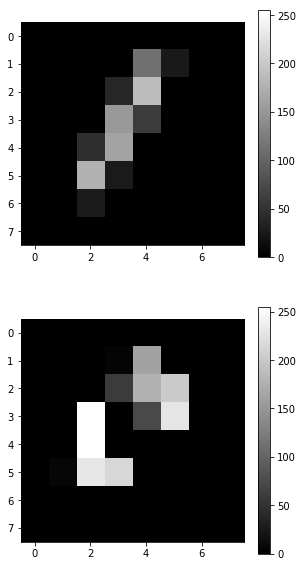

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[5,10])
plt.subplot(2,1,1)
plt.imshow(testX[idxtouse:idxtouse+1,:].reshape(8,8),cmap='gray')
plt.clim([0,255])
plt.colorbar()
plt.subplot(2,1,2)
plt.imshow(advsample.reshape(8,8),cmap='gray')
plt.colorbar()
plt.clim([0,255])
print(m.predict_noiseless(advX)[0])
print(m.predict_noiseless(advsample)[0])
print(N)
plt.savefig('reach-4.26081_or_95percent_threshold.pdf')

In [46]:
!pwd

/home/mike/Documents/Research/GPadversarial/jupyter


<Figure size 432x288 with 0 Axes>

In [15]:
np.sum(advX)

1224.6875

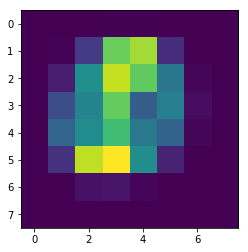

In [20]:
plt.imshow(np.mean(trainX,0).reshape(8,8))